# Preprocessing

## Check which patients have 5min and 15min bg measurements

In [1]:
import os
import pandas as pd

from src.features.tuners import XGBHyperparameterTuner

In [2]:
train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(train_data_file, index_col=0, low_memory=False)
patient_ids_train_data = train_data['p_num'].unique()
patient_ids_train_data

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12'],
      dtype=object)

In [3]:
test_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = pd.read_csv(test_data_file, index_col=0, low_memory=False)
patient_ids_test_data = test_data['p_num'].unique()
patient_ids_test_data

array(['p01', 'p02', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12', 'p15',
       'p16', 'p18', 'p19', 'p21', 'p22', 'p24'], dtype=object)

In [4]:
from src.features.transformers import FillPropertyNaNsTransformer, DropColumnsTransformer, DayPhaseTransformer

test_data = FillPropertyNaNsTransformer('insulin', ['median']).fit_transform(test_data)
test_data = FillPropertyNaNsTransformer('bg', ['interpolate']).fit_transform(test_data)
test_data = DayPhaseTransformer(time_column='time', time_format='%H:%M:%S', result_column='day_phase').transform(test_data)
test_data = DropColumnsTransformer(starts_with=['activity', 'carbs', 'steps', 'cals', 'hr']).transform(test_data)


def copy_from_df(df, columns, new_column_names):
    new_df = df[columns].copy().reset_index(drop=True)
    new_df.columns = new_column_names
    return new_df


default_columns = [
    'day_phase',
    'p_num',
]

bg_columns = [
    'bg+1:00',
    'bg-0:00',
    'bg-0:05',
    'bg-0:10',
    'bg-0:15',
    'bg-0:20',
    'bg-0:25',
    'bg-0:30',
    'bg-0:35',
    'bg-0:40',
    'bg-0:45',
    'bg-0:50',
    'bg-0:55',
    'bg-1:00',
    'bg-1:05',
    'bg-1:10',
    'bg-1:15',
    'bg-1:20',
    'bg-1:25',
    'bg-1:30',
    'bg-1:35',
    'bg-1:40',
    'bg-1:45',
    'bg-1:50',
    'bg-1:55',
    'bg-2:00',
    'bg-2:05',
    'bg-2:10',
    'bg-2:15',
    'bg-2:20',
    'bg-2:25',
    'bg-2:30',
    'bg-2:35',
    'bg-2:40',
    'bg-2:45',
    'bg-2:50',
    'bg-2:55',
    'bg-3:00',
    'bg-3:05',
    'bg-3:10',
    'bg-3:15',
    'bg-3:20',
    'bg-3:25',
    'bg-3:30',
    'bg-3:35',
    'bg-3:40',
    'bg-3:45',
    'bg-3:50',
    'bg-3:55',
    'bg-4:00',
    'bg-4:05',
    'bg-4:10',
    'bg-4:15',
    'bg-4:20',
    'bg-4:25',
    'bg-4:30',
    'bg-4:35',
    'bg-4:40',
    'bg-4:45',
    'bg-4:50',
    'bg-4:55',
    'bg-5:00',
    'bg-5:05',
    'bg-5:10',
    'bg-5:15',
    'bg-5:20',
    'bg-5:25',
    'bg-5:30',
    'bg-5:35',
    'bg-5:40',
    'bg-5:45',
    'bg-5:50',
    'bg-5:55'
]
insulin_columns = [
    'insulin-0:00',
    'insulin-0:05',
    'insulin-0:10',
    'insulin-0:15',
    'insulin-0:20',
    'insulin-0:25',
    'insulin-0:30',
    'insulin-0:35',
    'insulin-0:40',
    'insulin-0:45',
    'insulin-0:50',
    'insulin-0:55',
    'insulin-1:00',
    'insulin-1:05',
    'insulin-1:10',
    'insulin-1:15',
    'insulin-1:20',
    'insulin-1:25',
    'insulin-1:30',
    'insulin-1:35',
    'insulin-1:40',
    'insulin-1:45',
    'insulin-1:50',
    'insulin-1:55',
    'insulin-2:00',
    'insulin-2:05',
    'insulin-2:10',
    'insulin-2:15',
    'insulin-2:20',
    'insulin-2:25',
    'insulin-2:30',
    'insulin-2:35',
    'insulin-2:40',
    'insulin-2:45',
    'insulin-2:50',
    'insulin-2:55',
    'insulin-3:00',
    'insulin-3:05',
    'insulin-3:10',
    'insulin-3:15',
    'insulin-3:20',
    'insulin-3:25',
    'insulin-3:30',
    'insulin-3:35',
    'insulin-3:40',
    'insulin-3:45',
    'insulin-3:50',
    'insulin-3:55',
    'insulin-4:00',
    'insulin-4:05',
    'insulin-4:10',
    'insulin-4:15',
    'insulin-4:20',
    'insulin-4:25',
    'insulin-4:30',
    'insulin-4:35',
    'insulin-4:40',
    'insulin-4:45',
    'insulin-4:50',
    'insulin-4:55',
    'insulin-5:00',
    'insulin-5:05',
    'insulin-5:10',
    'insulin-5:15',
    'insulin-5:20',
    'insulin-5:25',
    'insulin-5:30',
    'insulin-5:35',
    'insulin-5:40',
    'insulin-5:45',
    'insulin-5:50',
    'insulin-5:55'
]

# stay the same
target_columns = default_columns + bg_columns[:26] + insulin_columns[:25]
source_columns = default_columns + bg_columns[1:2] + bg_columns[13:38] + insulin_columns[12:37]

new_test_data = copy_from_df(test_data, source_columns, target_columns)

for i in range(1, 36):
    source_columns = default_columns + bg_columns[1 + i:2 + i] + bg_columns[13 + i:38 + i] + insulin_columns[12 + i:37 + i]
    new_test_data = pd.concat([new_test_data, copy_from_df(test_data, source_columns, target_columns)], axis=0)
new_test_data

,day_phase,p_num,bg+1:00,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,insulin-1:15,insulin-1:20,insulin-1:25,insulin-1:30,insulin-1:35,insulin-1:40,insulin-1:45,insulin-1:50,insulin-1:55,insulin-2:00
0,morning,p01,9.6,13.533333,14.100000,14.266667,14.433333,14.600000,14.366667,14.133333,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0083,0.0083,0.0083,0.0083
1,noon,p01,4.6,3.900000,4.066667,4.233333,4.400000,4.600000,4.800000,5.000000,...,0.0459,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
2,afternoon,p01,8.0,4.900000,4.833333,4.766667,4.700000,4.900000,5.100000,5.300000,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
3,night,p01,9.9,6.400000,5.966667,5.533333,5.100000,4.633333,4.166667,3.700000,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083
4,night,p01,5.3,3.300000,3.166667,3.033333,2.900000,2.966667,3.033333,3.100000,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,morning,p24,5.5,6.400000,6.400000,6.400000,6.300000,6.300000,6.300000,6.400000,...,0.0771,0.0771,0.0783,0.0792,0.0776,0.0808,0.0833,0.0780,0.0771,0.0771
3640,noon,p24,5.9,6.400000,6.900000,7.200000,7.000000,6.900000,6.700000,6.300000,...,0.0458,0.0146,0.0119,0.0338,0.0792,0.0997,0.1117,0.0983,0.0640,0.0202
3641,night,p24,10.2,12.500000,12.300000,12.200000,12.200000,12.200000,12.000000,12.000000,...,0.0833,0.0833,0.4933,0.0833,0.0833,0.0833,0.3492,1.9852,0.2422,0.1855
3642,morning,p24,8.0,7.900000,7.900000,8.000000,8.500000,8.400000,8.300000,8.500000,...,0.0195,0.0000,0.0057,0.0277,0.0596,0.0771,0.0771,0.1005,0.1371,0.1144


In [5]:
from pipelines import preprocessing_pipeline

new_train_data = preprocessing_pipeline.fit_transform(train_data)
new_train_data = new_train_data[new_test_data.columns]
new_train_data

,day_phase,p_num,bg+1:00,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,insulin-1:15,insulin-1:20,insulin-1:25,insulin-1:30,insulin-1:35,insulin-1:40,insulin-1:45,insulin-1:50,insulin-1:55,insulin-2:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,morning,p01,13.4,15.1,15.466667,15.833333,16.2,16.566667,16.933333,17.3,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
p01_1,morning,p01,12.8,14.4,14.633333,14.866667,15.1,15.466667,15.833333,16.2,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
p01_2,morning,p01,15.5,13.9,14.066667,14.233333,14.4,14.633333,14.866667,15.1,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
p01_3,morning,p01,14.8,13.8,13.833333,13.866667,13.9,14.066667,14.233333,14.4,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
p01_4,morning,p01,12.7,13.4,13.533333,13.666667,13.8,13.833333,13.866667,13.9,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_25294,late_evening,p12,11.1,9.8,9.700000,9.300000,8.9,8.600000,8.700000,8.2,...,0.0000,0.0000,0.1250,0.0750,0.0500,0.0000,0.0750,0.0750,0.0500,13.0750
p12_25295,late_evening,p12,10.9,10.3,9.800000,9.700000,9.3,8.900000,8.600000,8.7,...,0.0000,0.0000,0.0000,0.1250,0.0750,0.0500,0.0000,0.0750,0.0750,0.0500
p12_25296,late_evening,p12,10.7,10.7,10.300000,9.800000,9.7,9.300000,8.900000,8.6,...,0.0000,0.0000,0.0000,0.0000,0.1250,0.0750,0.0500,0.0000,0.0750,0.0750


In [6]:
all_train_data = pd.concat([new_train_data, new_test_data], axis=0)
patient_ids = all_train_data['p_num'].unique()
patient_ids

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12',
       'p15', 'p16', 'p18', 'p19', 'p21', 'p22', 'p24'], dtype=object)

## Train a specific model for all patients

-----------p01-----------
Best hyperparameters found.
RMSE: 0.6575233396757959


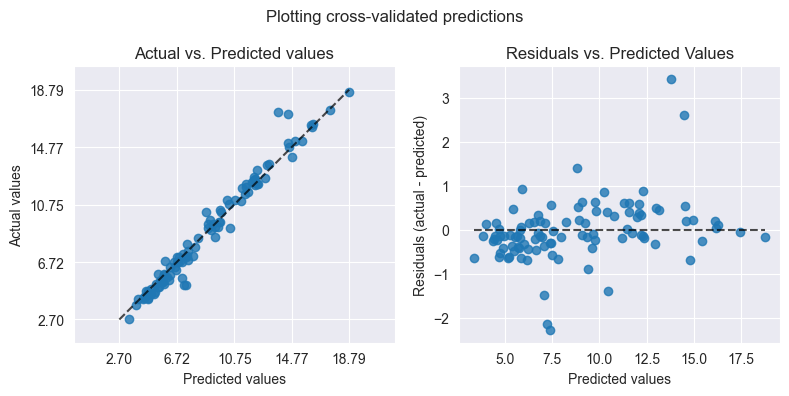

-----------p02-----------
Best hyperparameters found.
RMSE: 0.02433944004128522


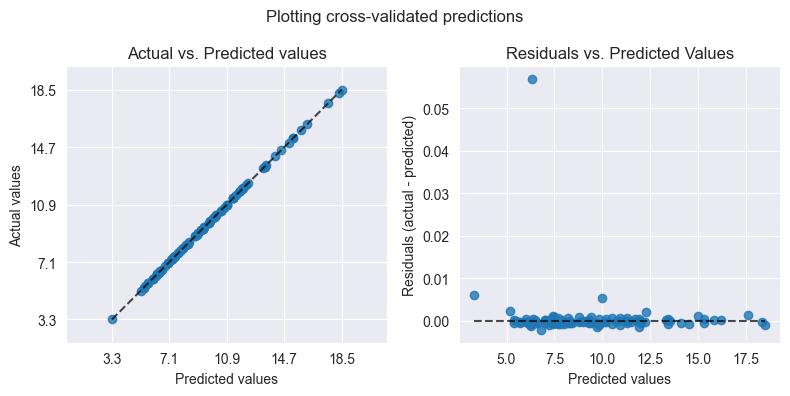

-----------p03-----------
Best hyperparameters found.
RMSE: 0.05875627686517526


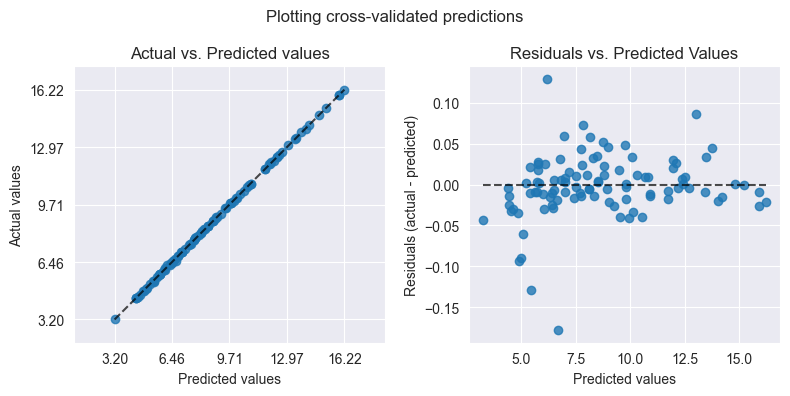

-----------p04-----------
Best hyperparameters found.
RMSE: 0.04252583036673244


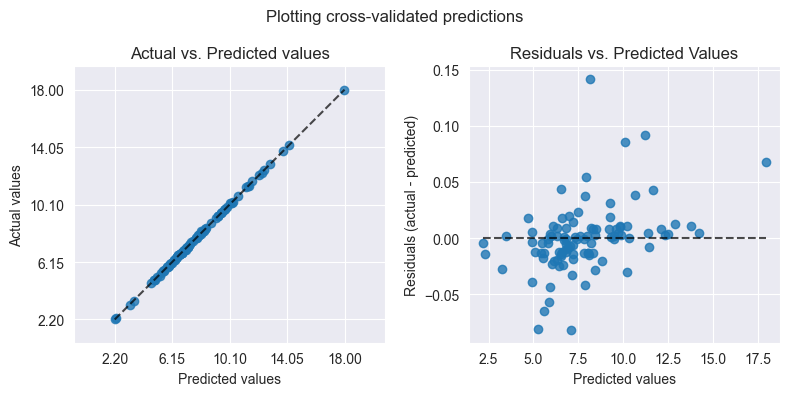

-----------p05-----------
Best hyperparameters found.
RMSE: 0.3253273141739125


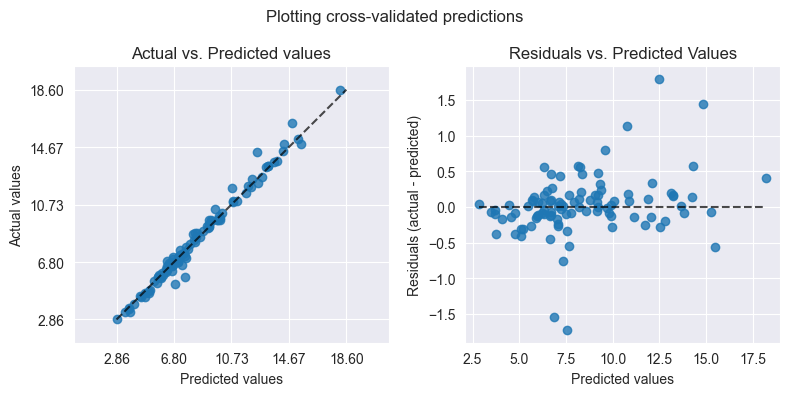

-----------p06-----------
Best hyperparameters found.
RMSE: 0.27932852589784796


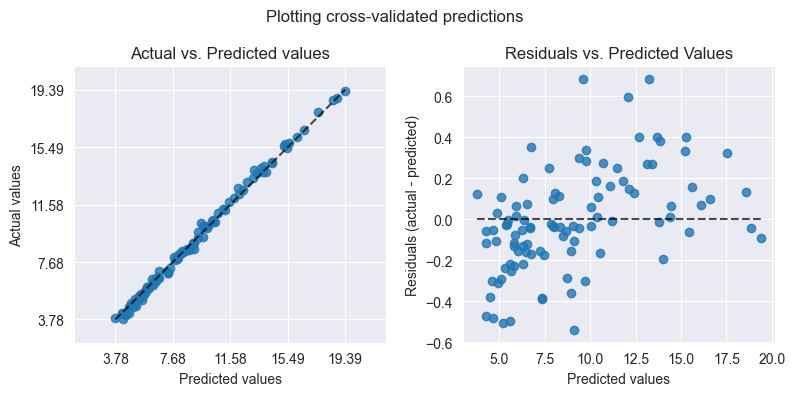

-----------p10-----------
Best hyperparameters found.
RMSE: 0.04276374353905858


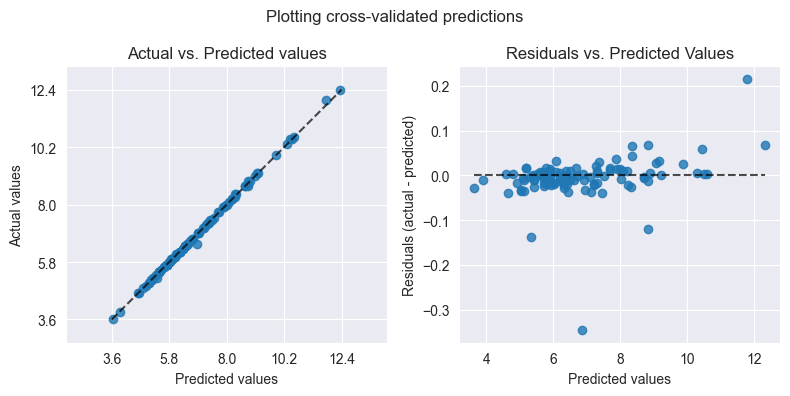

-----------p11-----------
Best hyperparameters found.
RMSE: 0.27940666850718915


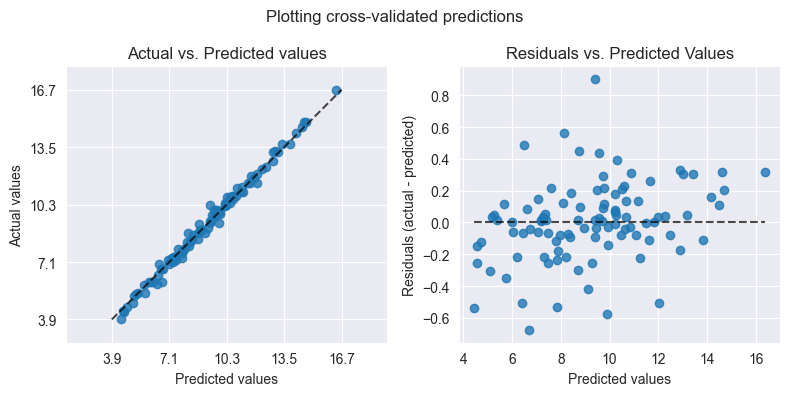

-----------p12-----------
Best hyperparameters found.
RMSE: 0.010001064441684792


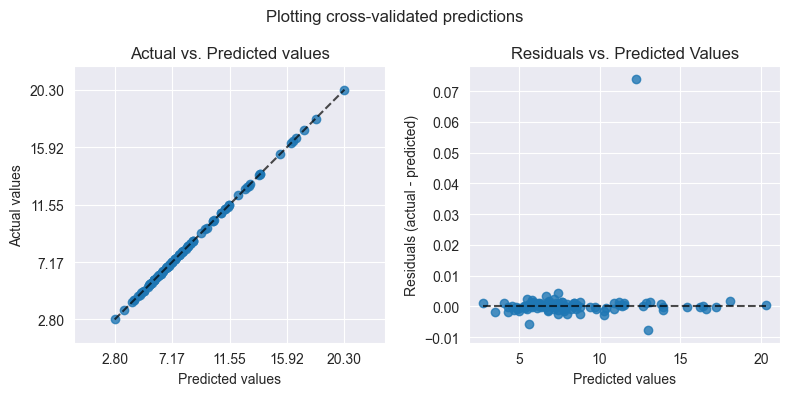

-----------p15-----------
Best hyperparameters found.
RMSE: 0.08200236323929426


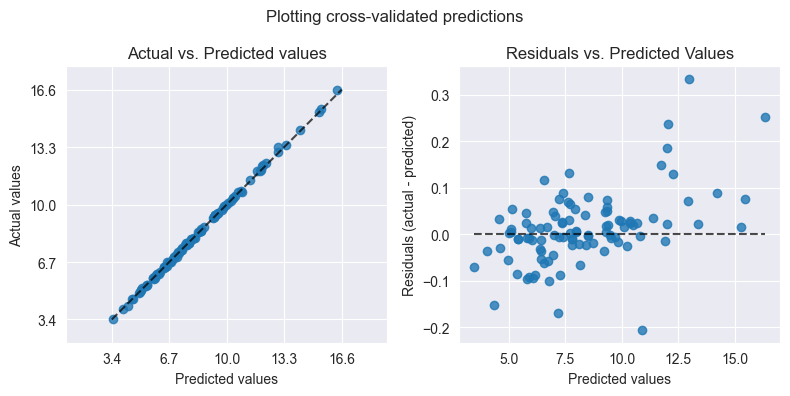

-----------p16-----------
Best hyperparameters found.
RMSE: 0.09074631979852757


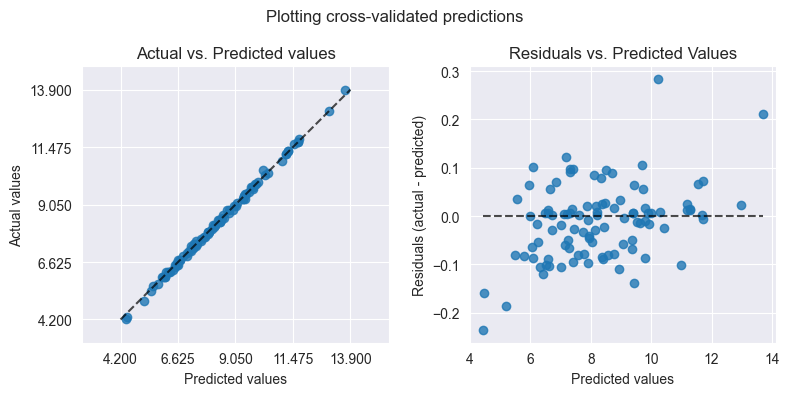

-----------p18-----------
Best hyperparameters found.
RMSE: 0.15941137011114934


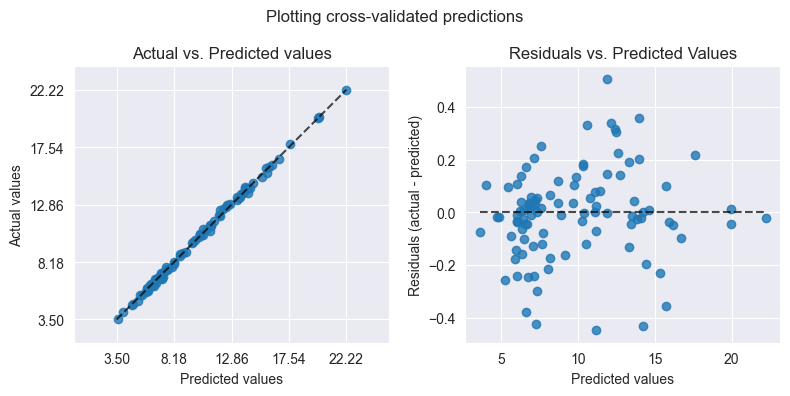

-----------p19-----------
Best hyperparameters found.
RMSE: 0.0488815774862545


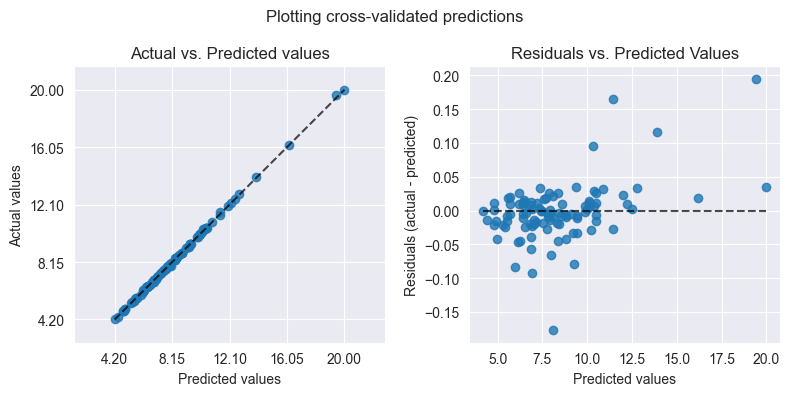

-----------p21-----------
Best hyperparameters found.
RMSE: 0.09287567674500558


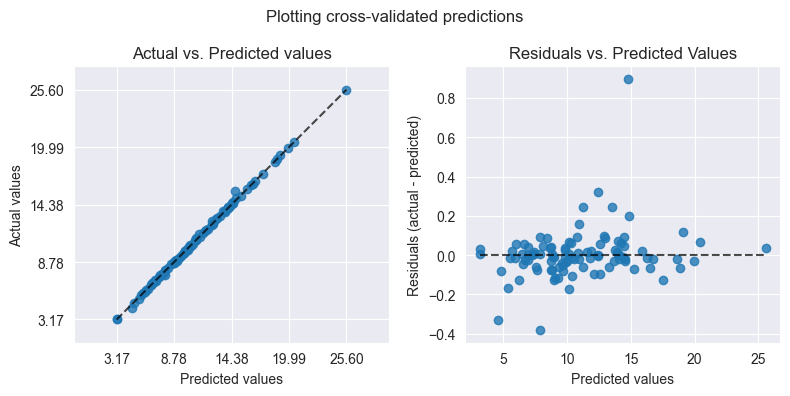

-----------p22-----------
Best hyperparameters found.
RMSE: 0.0011698183868980275


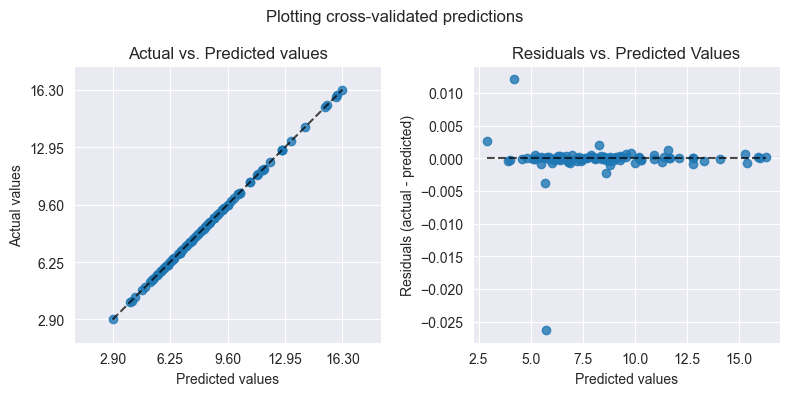

-----------p24-----------
Best hyperparameters found.
RMSE: 0.04582466672483471


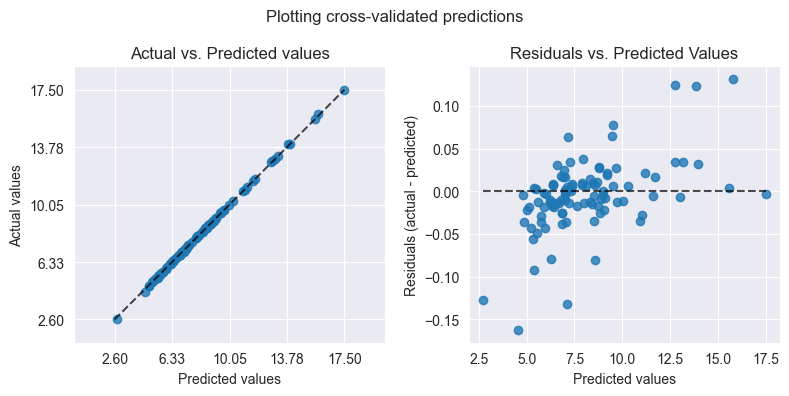

In [7]:
import joblib
from pipelines import standardization_pipeline

for patient_id in patient_ids:
    print(f'-----------{patient_id}-----------')
    data = all_train_data[all_train_data['p_num'] == patient_id]
    data = data.drop(columns=['p_num'])
    train_data_patient = standardization_pipeline.fit_transform(data)
    X = train_data_patient.drop(columns=['bg+1:00'])
    y = train_data_patient['bg+1:00']
    tuner = XGBHyperparameterTuner(search_space='deep')
    tuner.fit(X=X, y=y)

    print('Best hyperparameters found.')
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()

    joblib.dump(tuner.get_best_model(), f'XGBRegressor.{patient_id}.model.pkl')

In [8]:
all_train_data.to_csv('train_data.csv')